In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [5]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)
X_train['Fare_999']=X_train['Fare'].fillna(999)
X_train['Fare_minus1']=X_train['Fare'].fillna(-1)

In [16]:
print('original age variance: ',X_train['Age'].var())
print('99 age variance: ',X_train['Age_99'].var())
print('minus1 age variance: ',X_train['Age_minus1'].var())

print('original fare variance: ',X_train['Fare'].var())
print('999 fare variance: ',X_train['Fare_999'].var())
print('minus1 fare variance: ',X_train['Fare_minus1'].var())

original age variance:  204.3495133904614
99 age variance:  951.7275570187172
minus1 age variance:  318.0896202624484
original fare variance:  2448.197913706318
999 fare variance:  47219.20265217623
minus1 fare variance:  2378.5676784883503


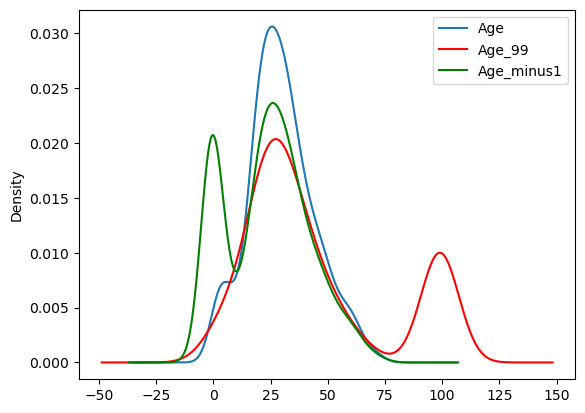

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_99'].plot(kind='kde',ax=ax,color='red')
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

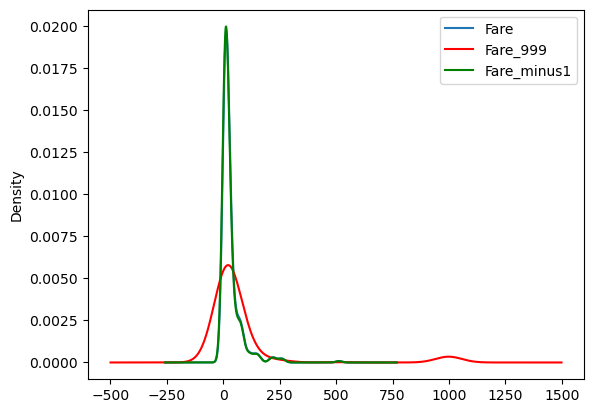

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Fare_999'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [18]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


<Axes: >

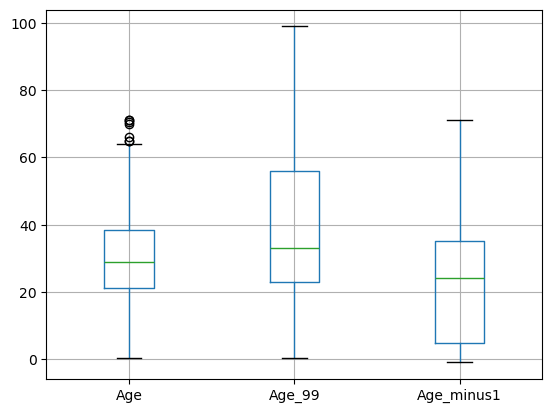

In [20]:
X_train[['Age','Age_99','Age_minus1']].boxplot()

<Axes: >

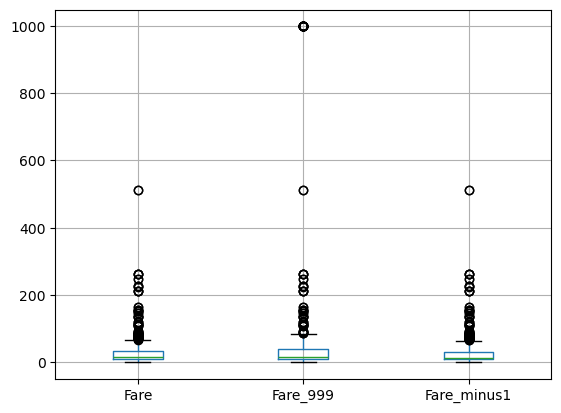

In [22]:
X_train[['Fare','Fare_999','Fare_minus1']].boxplot()